[wiki](https://en.wikipedia.org/wiki/One-way_analysis_of_variance)
Erik_Marsja [youtube](https://www.youtube.com/watch?time_continue=146&v=Lp2aV_4LF48) [blog](https://www.marsja.se/four-ways-to-conduct-one-way-anovas-using-python/)
[Understandable_Statistics](https://www.youtube.com/watch?v=0XsovsSnRuw&list=PL4BztsgicSEeC4Oic6s5vW4LE-0YZTuo-&index=21)

<div align="center"><img src="img/Screen Shot 2019-08-14 at 10.56.08 PM.png" width="100%" height="30%"></div>

https://en.wikipedia.org/wiki/One-way_analysis_of_variance

In [2]:
%matplotlib inline

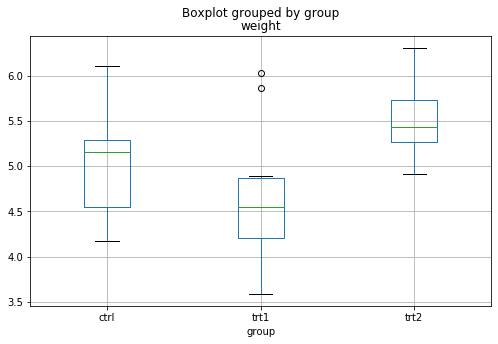

In [3]:
import pandas as pd
import numpy as np

if 1:
    # original data
    df = pd.read_csv("data/PlantGrowth.csv", usecols=[1,2])
elif 1:
    # original data + lots of noise
    df = pd.read_csv("data/PlantGrowth.csv", usecols=[1,2])
    np.random.seed = 1
    noise_level = 0.3
    noise = noise_level*np.random.normal(size=(int(df.shape[0]/3),3))
    noise = noise - np.mean(noise, axis=0)
    noise = noise.reshape(-1, order='F')
    df.weight = df.weight + noise
    
df.boxplot('weight', by='group', figsize=(8, 5))

In [4]:
from statsmodels.formula.api import ols
from statsmodels.stats.anova import anova_lm

# the "C" indicates categorical data
model = ols('weight ~ C(group)', df).fit()
print(anova_lm(model))

            df    sum_sq   mean_sq         F   PR(>F)
C(group)   2.0   3.76634  1.883170  4.846088  0.01591
Residual  27.0  10.49209  0.388596       NaN      NaN


<div align="center"><img src="img/Screen Shot 2019-08-15 at 2.21.10 PM.png" width="60%" height="30%"></div>

[Understandable_Statistics](https://www.youtube.com/watch?v=6TJ7wu3TpUM&list=PL4BztsgicSEeC4Oic6s5vW4LE-0YZTuo-&index=12)

In [4]:
import numpy as np

g = df.groupby(['group'])
for key, value in g:
    print(key)
    print(value)

ctrl
       weight group
0   37.782877  ctrl
1 -139.240679  ctrl
2  139.986803  ctrl
3   77.496301  ctrl
4 -197.694794  ctrl
5  -25.948347  ctrl
6   63.254508  ctrl
7  179.499888  ctrl
8 -215.321768  ctrl
9  -23.850089  ctrl
trt1
        weight group
10   80.368584  trt1
11  -40.614796  trt1
12   19.156640  trt1
13 -175.638665  trt1
14 -202.153446  trt1
15   22.761629  trt1
16   95.431042  trt1
17  155.684795  trt1
18 -101.007845  trt1
19    4.906532  trt1
trt2
        weight group
20   42.763683  trt2
21  -81.109475  trt2
22  162.538939  trt2
23 -127.334797  trt2
24 -116.124402  trt2
25  -35.415448  trt2
26   37.195352  trt2
27  -65.556910  trt2
28  -57.081299  trt2
29  133.779703  trt2


<div align="center"><img src="img/Screen Shot 2019-08-15 at 2.21.26 PM.png" width="80%" height="30%"></div>

[Understandable_Statistics](https://www.youtube.com/watch?v=6TJ7wu3TpUM&list=PL4BztsgicSEeC4Oic6s5vW4LE-0YZTuo-&index=12)

In [5]:
import numpy as np

g = df.groupby(['group'])
df_mean = pd.DataFrame(np.zeros((3,1)), index=['ctrl','trt1','trt2'])
for key, value in g:
    df_mean.loc[key] = value.weight.mean() 
print(df_mean)

mean_table = df_mean.copy()
mean_table.loc['Overall_Mean',:] = df_mean.mean()
print(mean_table)

              0
ctrl -10.403530
trt1 -14.110553
trt2 -10.634465
                      0
ctrl         -10.403530
trt1         -14.110553
trt2         -10.634465
Overall_Mean -11.716183


<div align="center"><img src="img/Screen Shot 2019-08-15 at 4.18.23 PM.png" width="80%" height="30%"></div>

[Understandable_Statistics](https://www.youtube.com/watch?v=6TJ7wu3TpUM&list=PL4BztsgicSEeC4Oic6s5vW4LE-0YZTuo-&index=12)

<div align="center"><img src="img/Screen Shot 2019-08-15 at 4.19.01 PM.png" width="100%" height="30%"></div>

[Understandable_Statistics](https://www.youtube.com/watch?v=6TJ7wu3TpUM&list=PL4BztsgicSEeC4Oic6s5vW4LE-0YZTuo-&index=12)

In [6]:
global_mean = df.weight.mean()
SS_total = np.sum((df.weight - global_mean)**2)
print('SS_total : {}'.format(SS_total))

SS_group = np.sum(np.sum((df_mean - global_mean)**2)) * (df.shape[0]/3)
print('SS_treatment : {}'.format(SS_group))

SS_error = SS_total - SS_group
print('SS_error : {}'.format(SS_error))

SS_total : 382105.9554753016
SS_treatment : 86.26178529295709
SS_error : 382019.69369000866


<div align="center"><img src="img/Screen Shot 2019-08-15 at 2.26.15 PM.png" width="80%" height="30%"></div>

[Understandable_Statistics](https://www.youtube.com/watch?v=6TJ7wu3TpUM&list=PL4BztsgicSEeC4Oic6s5vW4LE-0YZTuo-&index=12)

In [7]:
DF_group = 3-1
DF_total = df.shape[0] - 1
DF_error = DF_total - DF_group

<div align="center"><img src="img/Screen Shot 2019-08-15 at 4.23.01 PM.png" width="80%" height="30%"></div>

[Understandable_Statistics](https://www.youtube.com/watch?v=6TJ7wu3TpUM&list=PL4BztsgicSEeC4Oic6s5vW4LE-0YZTuo-&index=12)

In [8]:
MS_group = SS_group / DF_group
MS_error = SS_error / DF_error

<div align="center"><img src="img/Screen Shot 2019-08-15 at 2.27.12 PM.png" width="80%" height="30%"></div>

[Understandable_Statistics](https://www.youtube.com/watch?v=6TJ7wu3TpUM&list=PL4BztsgicSEeC4Oic6s5vW4LE-0YZTuo-&index=12)

In [9]:
import scipy.stats as stats

F_group = MS_group / MS_error 
print(F_group)

p_value_group = 1 - stats.f.cdf(F_group, DF_group, DF_error)  
print(p_value_group)

0.003048361434475905
0.996956623169494
